# Welcome to Data Visualization in Python (introduction) workshop!

In today's workshop, we'll learn

- Different types of plots depending on the characteristic of your data/variables
- How to plot by group
- How to assign different aesthetics (size/color/shape/etc) 
- How to refine your plot (title/axis labels/legends)
- How to generate subplots 
- How to save your plot in your local machine

## For today's workshop, let us use the famous `Titanic` data set!

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew. 

The data set contains various information on each passenger, including their name, sex, age, cabin class, ticket fare, and most importantly, their survival. So using these variables, we'll plot various graphs and henceforth be able to deduce a couple of plausible conclusions out of them!

## Let us import the necessary packages first!

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd # for data import/data wrangling
import seaborn as sns # for statistical visualization

## 0. Let us read the data set first, glimpse it, and do a bit of *preprocessing*.

In [4]:
titanic = pd.read_csv('titanic_train.csv')
titanic_org = pd.read_csv('titanic_train.csv') # save the original data for just in case

In [5]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
## Let us select only the necessary columns for our mission today
titanic = titanic.loc[:, ["Survived", "Pclass", "Sex", "Age", "Fare"]]
titanic.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [7]:
titanic.shape

(891, 5)

In [8]:
titanic.value_counts("Pclass")

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [9]:
titanic.describe()

,Survived,Pclass,Age,Fare
count,891.000000,891.000000,714.000000,891.000000
mean,0.383838,2.308642,29.699118,32.204208
std,0.486592,0.836071,14.526497,49.693429
min,0.000000,1.000000,0.420000,0.000000
25%,0.000000,2.000000,20.125000,7.910400
50%,0.000000,3.000000,28.000000,14.454200
75%,1.000000,3.000000,38.000000,31.000000
max,1.000000,3.000000,80.000000,512.329200


In [10]:
titanic.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
Fare        float64
dtype: object

## 1. Different types of plots

### Different types of variables

But first, we can categorize variables into different types as follows:

    - for numerical (quantitative) values: continuous (float) vs discrete (integer)
    - for categorical (qualitative) values: nominal (no specific order) vs ordinal (following specific order)
   
So for our data set, we can say (ideally),

    - Survived: categorical (nominal)
    - Pclass: categorical (nominal/ordinal)
    - Sex: categorical (nominal)
    - Age: numerical (discrete)
    - Fare: numerical (continuous)

### So by using these variables, we can draw...

- Histogram/density plot: distribution of **one numerical variable**
- Boxplot: distribution of **one numerical** variable across another categorical variable
- Countplot: counts of **one categorical variable** versus another categorical variable
- Scatter plot: observations made across **two different numerical variables**


## 2. So let us get into different types of plots using the `titanic` data set!

### Histogram of `Age`

<Axes: xlabel='Age', ylabel='Count'>

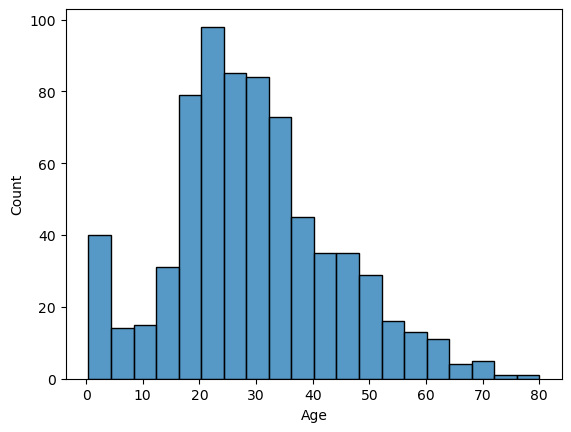

In [10]:
sns.histplot(titanic, x = "Age")

<Axes: xlabel='Age', ylabel='Proportion'>

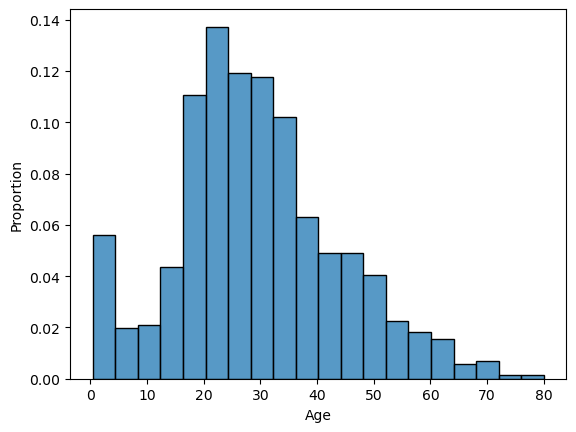

In [12]:
sns.histplot(titanic, x = "Age", stat="proportion")

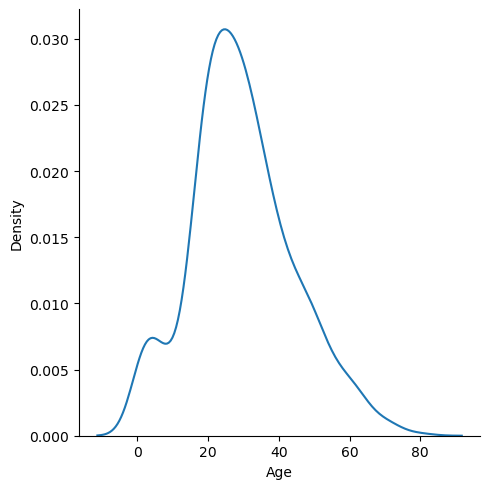

In [11]:
# density plot: relative distribution
sns.displot(titanic, x = "Age", kind="kde")

<Axes: xlabel='Age', ylabel='Count'>

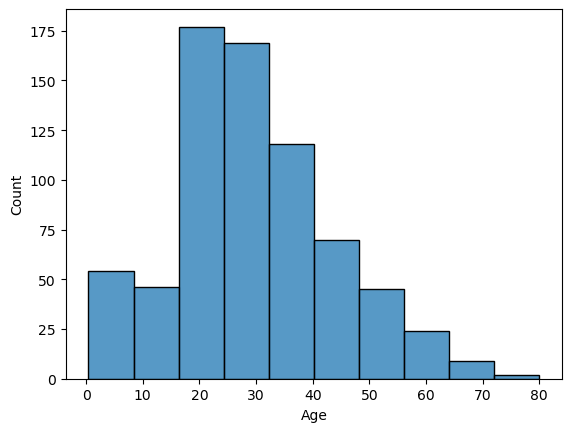

In [12]:
# we can change the number of bins
sns.histplot(titanic, x = "Age", bins = 10)

In [13]:
# Can we draw histogram of Age for two different sexes?
titanic.value_counts("Sex")

Sex
male      577
female    314
Name: count, dtype: int64

<Axes: xlabel='Age', ylabel='Count'>

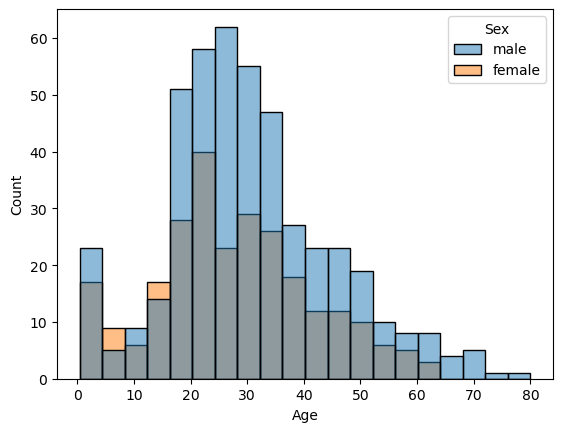

In [14]:
sns.histplot(titanic, x = "Age", hue = "Sex")

<Axes: xlabel='Age', ylabel='Count'>

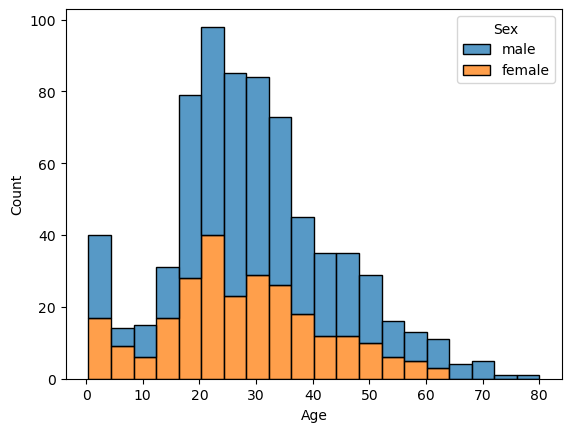

In [15]:
sns.histplot(titanic, x = "Age", hue = "Sex", multiple = "stack")

<Axes: xlabel='Age', ylabel='Count'>

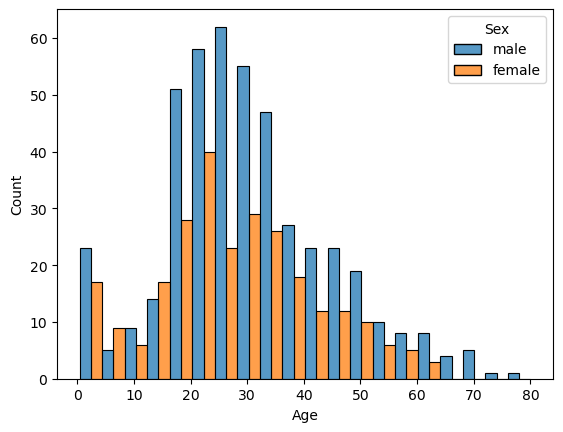

In [16]:
sns.histplot(titanic, x = "Age", hue = "Sex", multiple = "dodge")

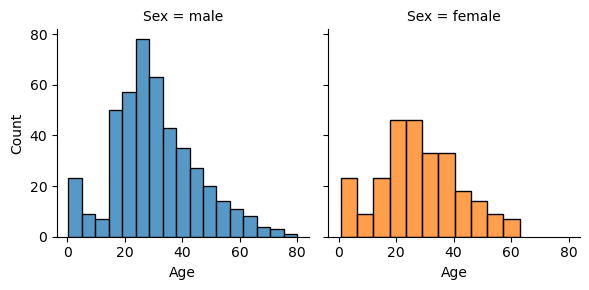

In [20]:
# Use facet grids
g1 = sns.FacetGrid(titanic, col ='Sex', hue='Sex') # try row = 'Sex' instead of col = 'Sex'.
g1.map(sns.histplot, 'Age')

In [21]:
?g1.map

Signature: g1.map(func, *args, **kwargs)
Docstring:
Apply a plotting function to each facet's subset of the data.

Parameters
----------
func : callable
    A plotting function that takes data and keyword arguments. It
    must plot to the currently active matplotlib Axes and take a
    `color` keyword argument. If faceting on the `hue` dimension,
    it must also take a `label` keyword argument.
args : strings
    Column names in self.data that identify variables with data to
    plot. The data for each variable is passed to `func` in the
    order the variables are specified in the call.
kwargs : keyword arguments
    All keyword arguments are passed to the plotting function.

Returns
-------
self : object
    Returns self.
File:      c:\users\kiwon\anaconda3\lib\site-packages\seaborn\axisgrid.py
Type:      method

In [17]:
# Example to explain how the map function works
rows = np.array([[1,2,3], [4,5,6]])
rows


array([[1, 2, 3],
       [4, 5, 6]])

In [18]:
list(map(np.mean, rows))

[2.0, 5.0]

<Axes: xlabel='Pclass', ylabel='Fare'>

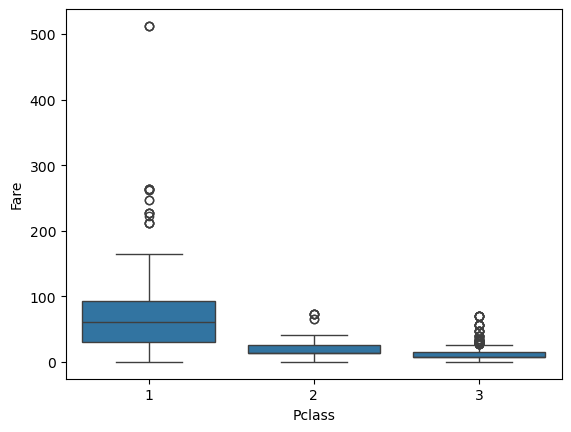

In [21]:
### Let us draw some boxplots
sns.boxplot(data=titanic, x="Pclass", y="Fare")

More about boxplots, see for example, https://en.wikipedia.org/wiki/Box_plot.

<Axes: xlabel='Pclass', ylabel='Fare'>

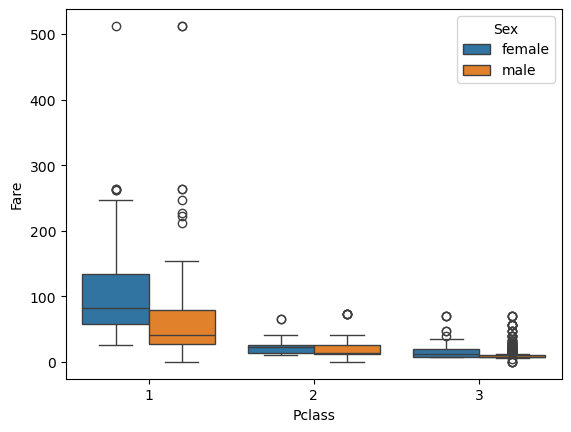

In [19]:
sns.boxplot(data=titanic, x="Pclass", y="Fare", hue = 'Sex')

<Axes: xlabel='Pclass', ylabel='Age'>

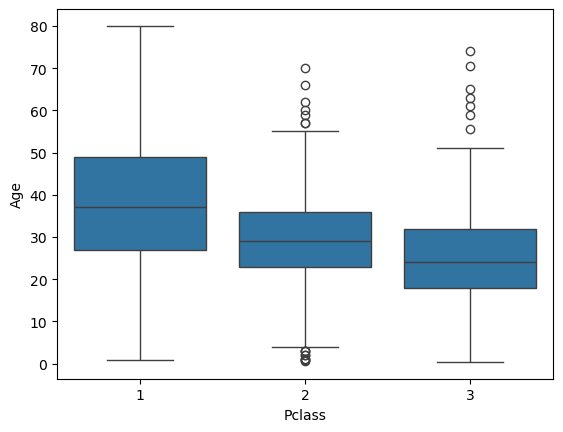

In [20]:
sns.boxplot(data=titanic, x="Pclass", y="Age")

<Axes: xlabel='Pclass', ylabel='count'>

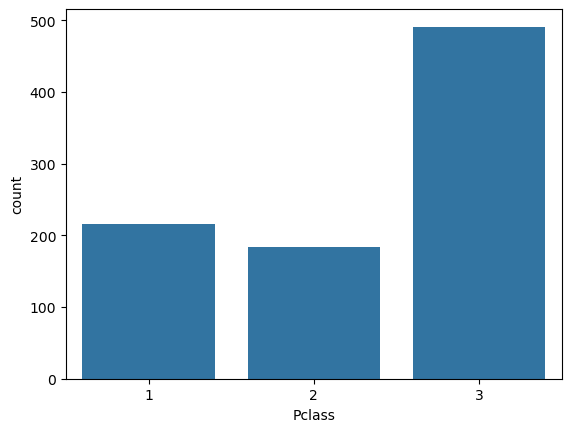

In [22]:
### How about countplots?
titanic["Pclass"] = pd.Categorical(titanic.Pclass)
sns.countplot(titanic, x = "Pclass")


<Axes: xlabel='Pclass', ylabel='count'>

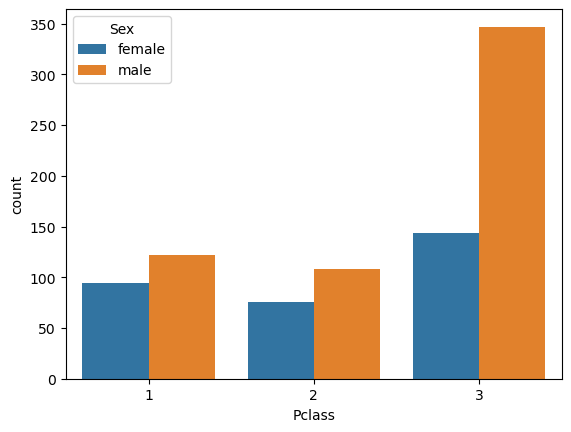

In [23]:
sns.countplot(titanic_org, x = "Pclass", hue = "Sex")

<Axes: xlabel='Pclass', ylabel='count'>

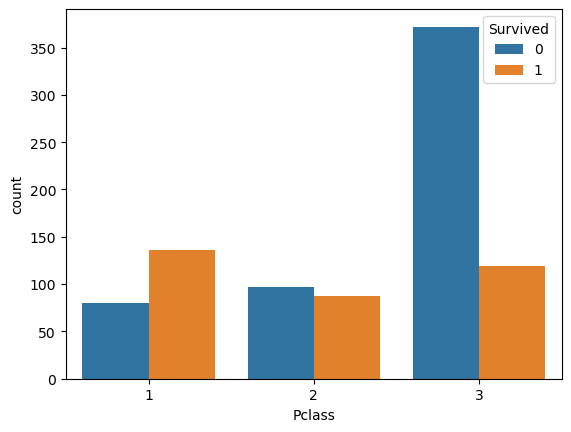

In [28]:
sns.countplot(titanic, x = "Pclass", hue = "Survived")

C:\Users\Kiwon\anaconda3\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


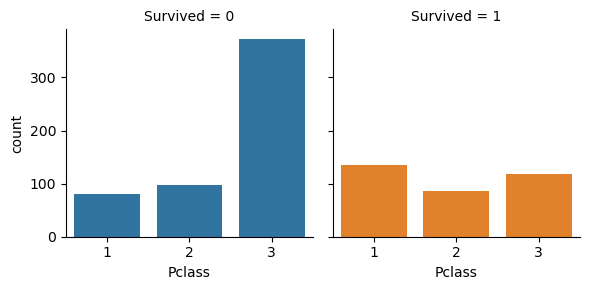

In [24]:
# Use facet grids
g2 = sns.FacetGrid(titanic, col ='Survived', hue='Survived') # try row = 'Sex' instead of col = 'Sex'.
g2.map(sns.countplot, 'Pclass')

### How About Scatter Plot?

<Axes: xlabel='Age', ylabel='Fare'>

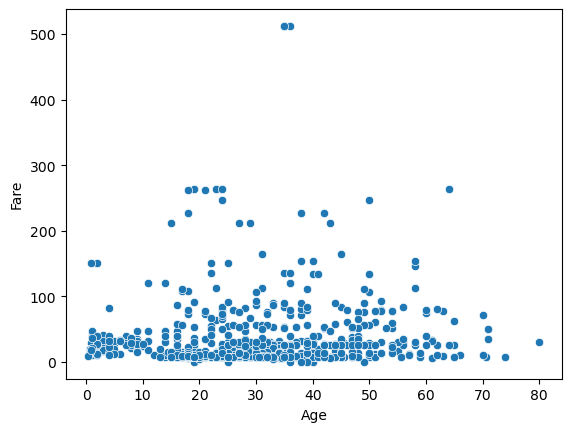

In [34]:
sns.scatterplot(data=titanic, x="Age", y="Fare")

<Axes: xlabel='Age', ylabel='Fare'>

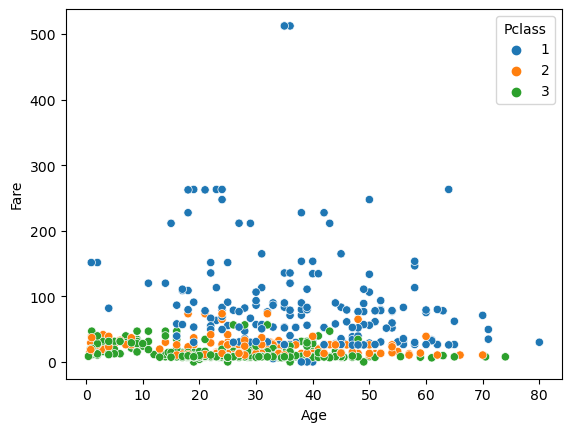

In [35]:
sns.scatterplot(data=titanic, x="Age", y="Fare", hue = "Pclass")

<Axes: xlabel='Age', ylabel='Fare'>

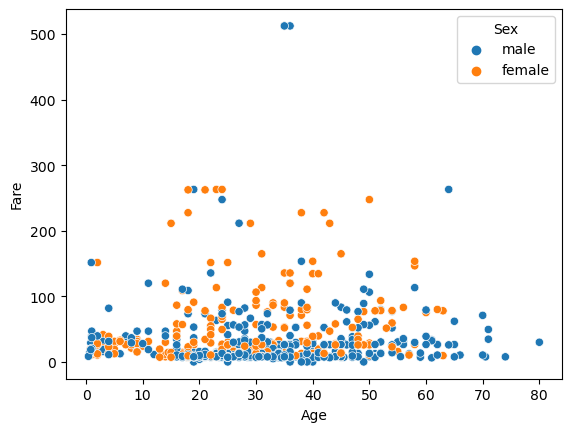

In [36]:
sns.scatterplot(data=titanic, x="Age", y="Fare", hue = "Sex")

<Axes: xlabel='Age', ylabel='Fare'>

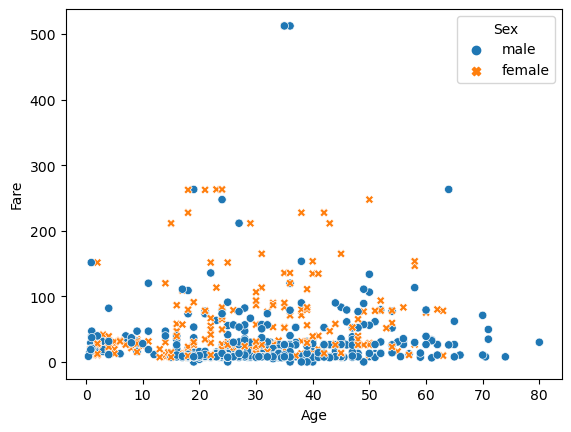

In [37]:
sns.scatterplot(data=titanic, x="Age", y="Fare", hue = "Sex", style = "Sex")

<Axes: xlabel='Pclass', ylabel='Fare'>

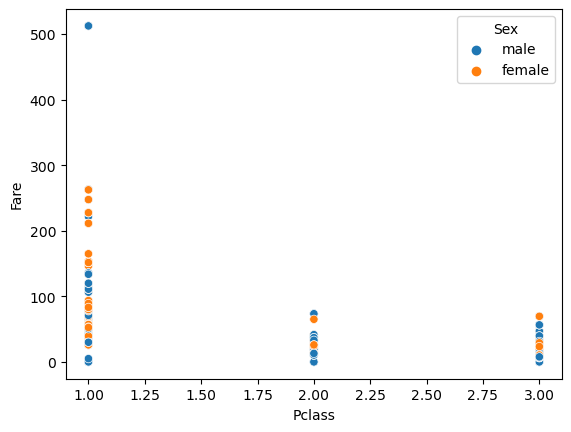

In [38]:
# You can still draw a scatter plot with one categorical variable:
# But boxplot would be much better in terms of interpretability
sns.scatterplot(data=titanic, x="Pclass", y="Fare", hue = "Sex")

### Other cool plots

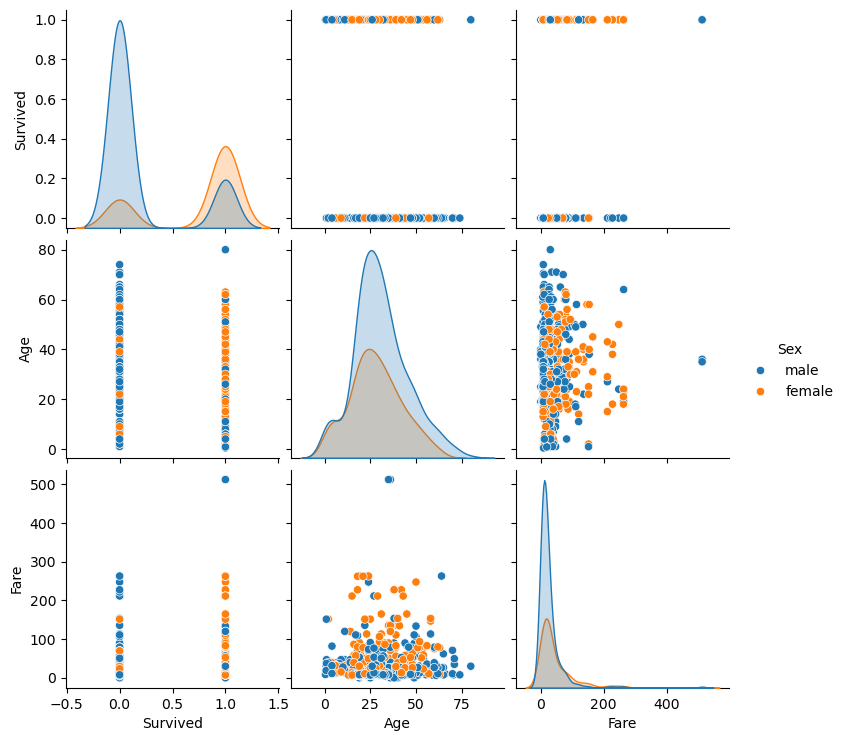

In [25]:
sns.pairplot(titanic, hue = "Sex")

In [33]:
?pd.reset_index()

Object `pd.reset_index()` not found.


In [26]:
titanic_summary = titanic.groupby(['Sex','Pclass'])['Fare'].agg(count= 'count')
titanic_summary

C:\Users\Kiwon\AppData\Local\Temp\ipykernel_11088\3361649251.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  titanic_summary = titanic.groupby(['Sex','Pclass'])['Fare'].agg(count= 'count')


count
Sex    Pclass       
female 1          94
       2          76
       3         144
male   1         122
       2         108
       3         347

In [40]:
titanic_summary.columns

Index(['count'], dtype='object')

In [41]:
titanic_summary.shape

(6, 1)

In [27]:
titanic_summary = titanic.groupby(['Sex','Pclass'])['Fare'].agg('count').reset_index()
titanic_summary

C:\Users\Kiwon\AppData\Local\Temp\ipykernel_11088\3323993658.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  titanic_summary = titanic.groupby(['Sex','Pclass'])['Fare'].agg('count').reset_index()


,Sex,Pclass,Fare
0,female,1,94
1,female,2,76
2,female,3,144
3,male,1,122
4,male,2,108
5,male,3,347


In [28]:
titanic_summary_wider = titanic_summary.pivot(index=["Sex"], columns="Pclass", values="Fare")
titanic_summary_wider

Pclass,1,2,3
Sex,,,
female,94,76,144
male,122,108,347


<Axes: xlabel='Pclass', ylabel='Sex'>

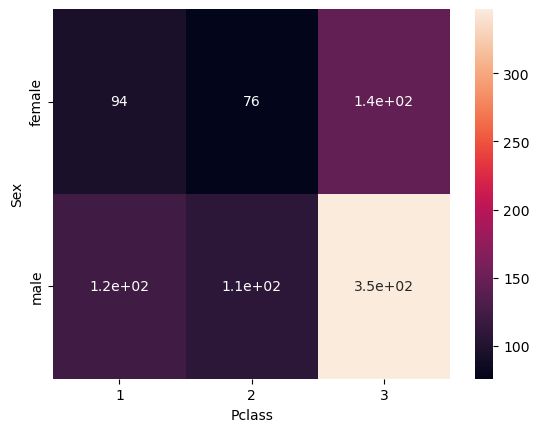

In [44]:
sns.heatmap(titanic_summary_wider, annot = True)

## 3. How to Generate Subplots

`plt.subplots` creates a figure and a grid of subplots with a single call, while providing reasonable control over how the individual plots are created.

Text(0.5, 0.98, 'Titanic data set: Age versus Fare')

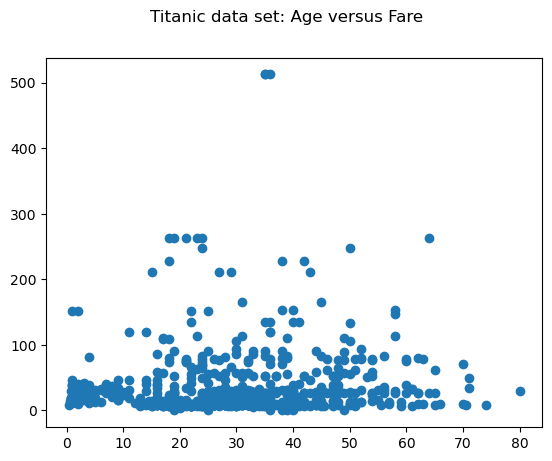

In [29]:
#without any arguments: single plot
x = titanic["Age"]
y = titanic["Fare"]

fig, ax = plt.subplots()
ax.scatter(x, y)
fig.suptitle('Titanic data set: Age versus Fare')
#ax.set_title('Titanic data set: Age versus Fare')

`fig` is a Figure object. It represents the whole figure or window in which plots are drawn. The figure can contain one or more axes (ax objects). You can think of fig as the *canvas* or the container that holds all the elements of the plot.

`ax` is an Axes object or an array of Axes objects. Axes are the actual plots or graphs where your data will be visualized. It's the region of the image with the data space. Multiple Axes can be added to a single figure.

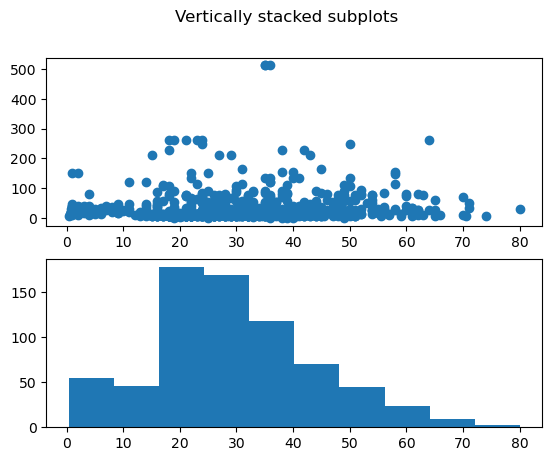

In [30]:
# specify the dimension of your axes
# vertical stack
fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('Vertically stacked subplots')
ax1.scatter(x, y)
ax2.hist(x);


(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

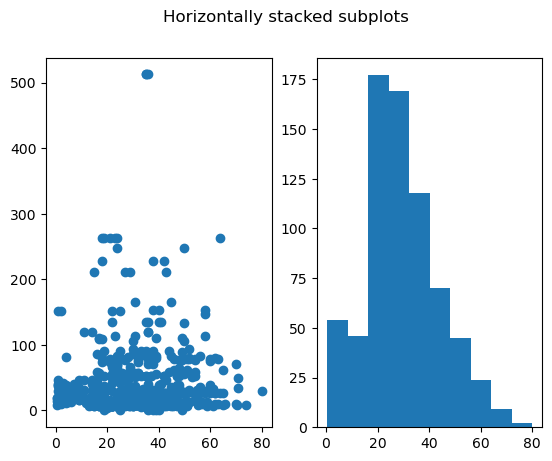

In [17]:
# horizontal stack
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Horizontally stacked subplots')
ax1.scatter(x, y)
ax2.hist(x)

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

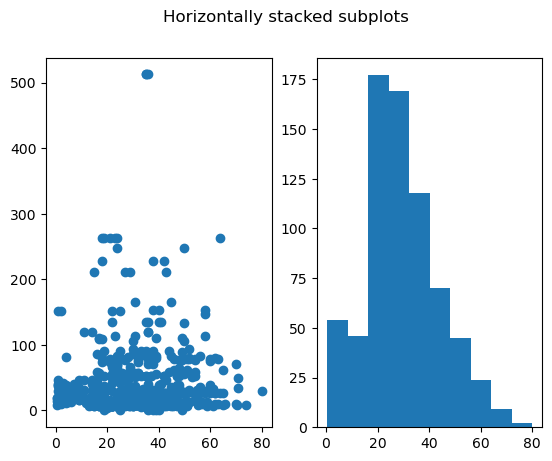

In [31]:
# When stacking in one direction only, the returned axis is a 1D numpy array containing the list of created Axes.
fig, axes = plt.subplots(1, 2)
fig.suptitle('Horizontally stacked subplots')
axes[0].scatter(x, y)
axes[1].hist(x)

Text(0.5, 1.0, 'Axis [1, 1]')

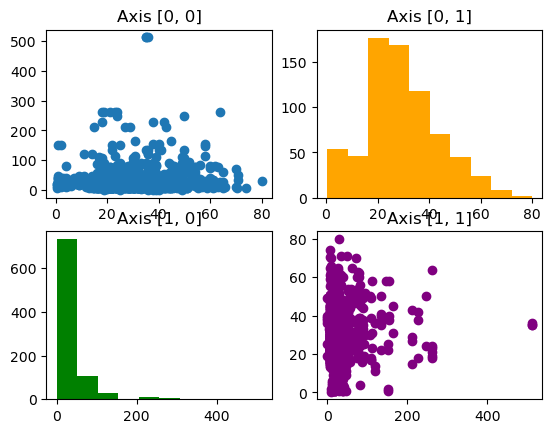

In [32]:
# Let us generate 2x2 subplots!
fig, axes = plt.subplots(2, 2)
axes[0, 0].scatter(x, y)
axes[0, 0].set_title('Axis [0, 0]')
axes[0, 1].hist(x, color = "orange")
axes[0, 1].set_title('Axis [0, 1]')
axes[1, 0].hist(y, color = "green")
axes[1, 0].set_title('Axis [1, 0]')
axes[1, 1].scatter(y, x, color = "purple")
axes[1, 1].set_title('Axis [1, 1]')

In [33]:
?plt.subplots

Signature:
plt.subplots(
    nrows: 'int' = 1,
    ncols: 'int' = 1,
    *,
    sharex: "bool | Literal['none', 'all', 'row', 'col']" = False,
    sharey: "bool | Literal['none', 'all', 'row', 'col']" = False,
    squeeze: 'bool' = True,
    width_ratios: 'Sequence[float] | None' = None,
    height_ratios: 'Sequence[float] | None' = None,
    subplot_kw: 'dict[str, Any] | None' = None,
    gridspec_kw: 'dict[str, Any] | None' = None,
    **fig_kw,
) -> 'tuple[Figure, Any]'
Docstring:
Create a figure and a set of subplots.

This utility wrapper makes it convenient to create common layouts of
subplots, including the enclosing figure object, in a single call.

Parameters
----------
nrows, ncols : int, default: 1
    Number of rows/columns of the subplot grid.

sharex, sharey : bool or {'none', 'all', 'row', 'col'}, default: False
    Controls sharing of properties among x (*sharex*) or y (*sharey*)
    axes:

    - True or 'all': x- or y-axis will be shared among all subplots.
    - False

## 4. Let us Refine Our Plots

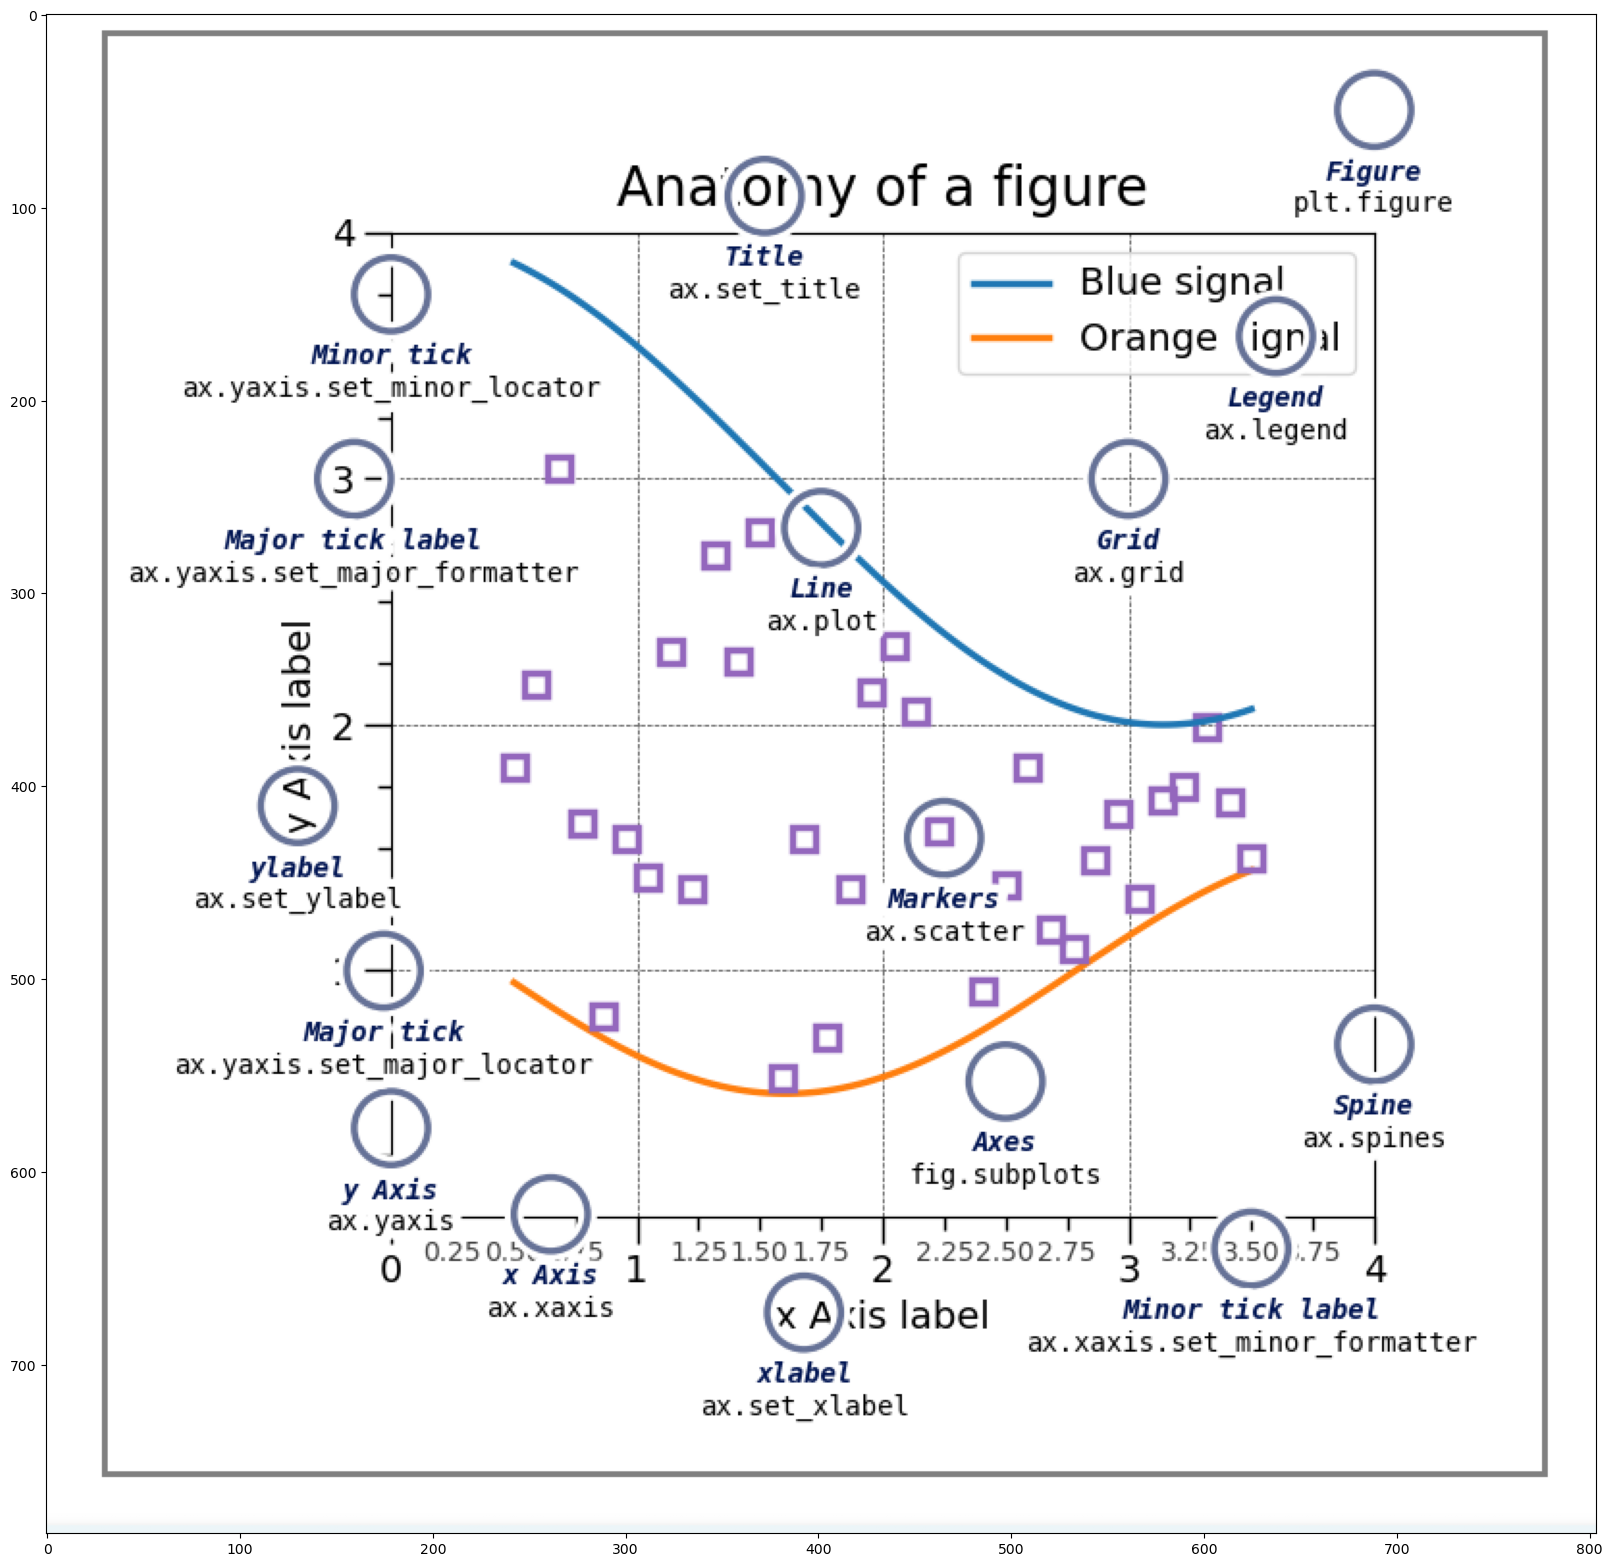

In [169]:
from matplotlib import image as img

image = img.imread("anatomy.png")
plt.figure(figsize = (20,20))
plt.imshow(image)


### Let us add title/ labels

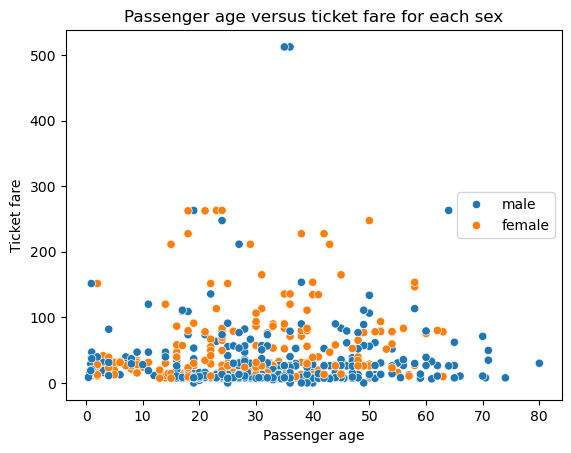

In [34]:
sns.scatterplot(data=titanic, x="Age", y="Fare", hue = "Sex")
plt.title('Passenger age versus ticket fare for each sex')
plt.xlabel('Passenger age')
plt.ylabel('Ticket fare')
plt.legend(loc='right')

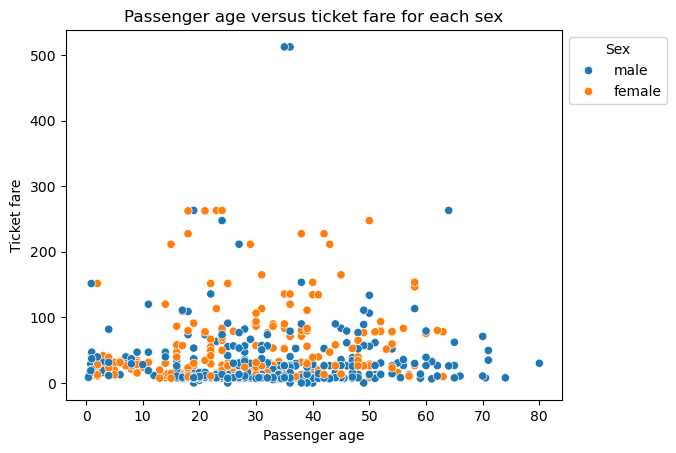

In [35]:
ax = sns.scatterplot(data=titanic, x="Age", y="Fare", hue = "Sex")
plt.title('Passenger age versus ticket fare for each sex')
plt.xlabel('Passenger age')
plt.ylabel('Ticket fare')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

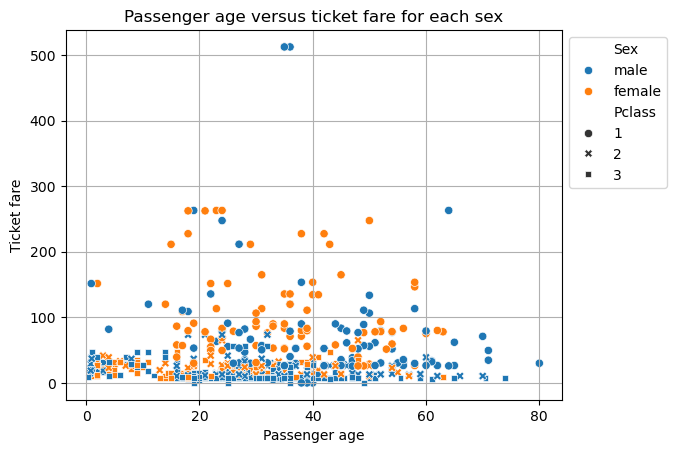

In [36]:
ax = sns.scatterplot(data=titanic, x="Age", y="Fare", hue = "Sex", style = "Pclass")
plt.title('Passenger age versus ticket fare for each sex')
plt.xlabel('Passenger age')
plt.ylabel('Ticket fare')
ax.set_xticks(range(0,81,20)) # x axis ticks
plt.grid()  #grid line
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))


### A bit of digression: linear regression plots

C:\Users\Kiwon\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


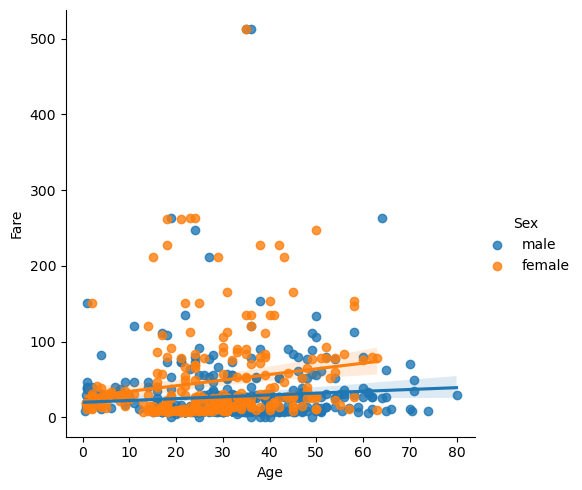

In [133]:
# linear best fit and confidence interval
sns.lmplot(x = "Age", y = "Fare",
           hue = "Sex", data = titanic)

/Users/kiwonlee/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


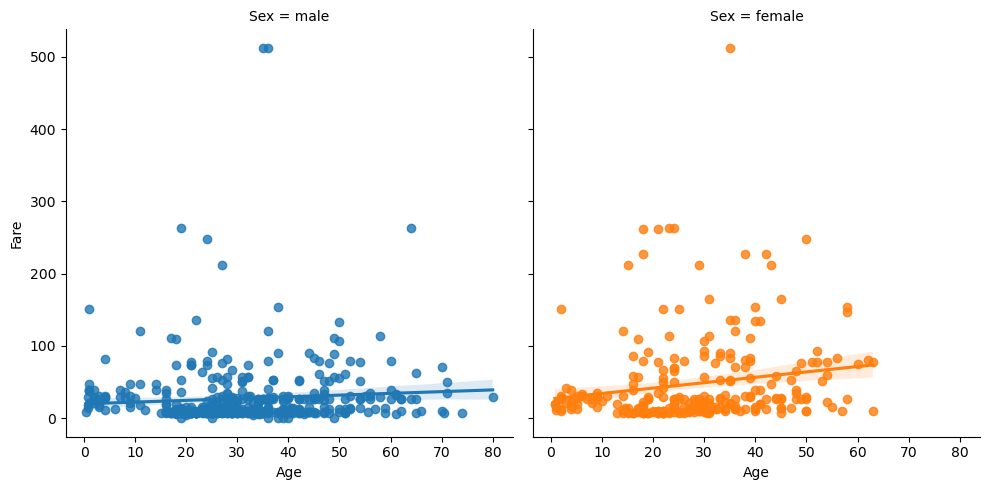

In [46]:
sns.lmplot(x = "Age", y = "Fare", col = "Sex",
           hue = "Sex", data = titanic)

C:\Users\Kiwon\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


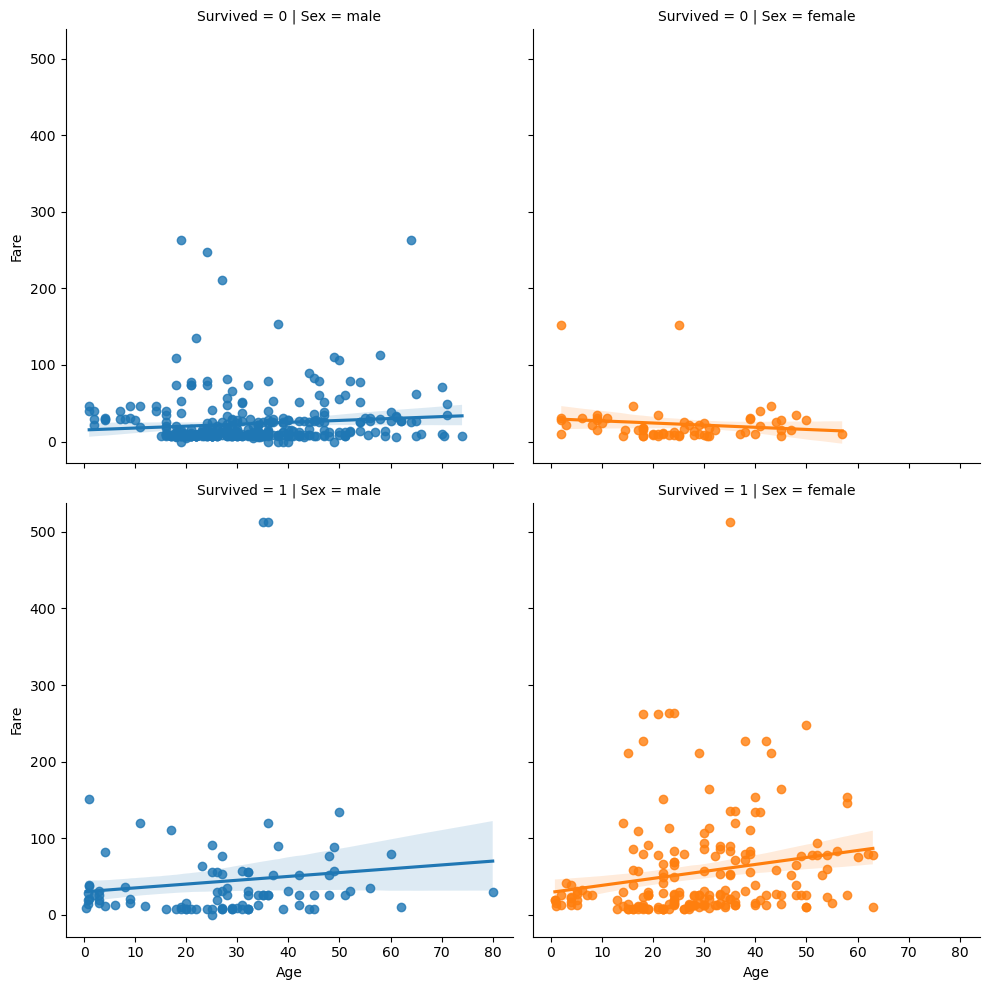

In [137]:
sns.lmplot(x = "Age", y = "Fare", col = "Sex", row = "Survived",
           hue = "Sex", data = titanic)

In [43]:
#adapted from https://stackoverflow.com/questions/56634026/regression-by-group-and-display-output-in-python

import statsmodels.api as sm 

titanic_nona= titanic.dropna(axis= 0, how='any') #drop all the NA values

def regress(data, yvar, xvars):
    Y = data[yvar]
    X = data[[xvars]].copy()
    X['intercept'] = 1.
    result = sm.OLS(Y, X).fit()
    return result.params

titanic_nona.groupby(['Sex','Survived']).apply(regress, 'Fare', 'Age', include_groups=False)

Age  intercept
Sex    Survived                     
female 0        -0.278976  29.759342
       1         0.909401  29.409018
male   0         0.249085  15.124278
       1         0.499777  30.161924

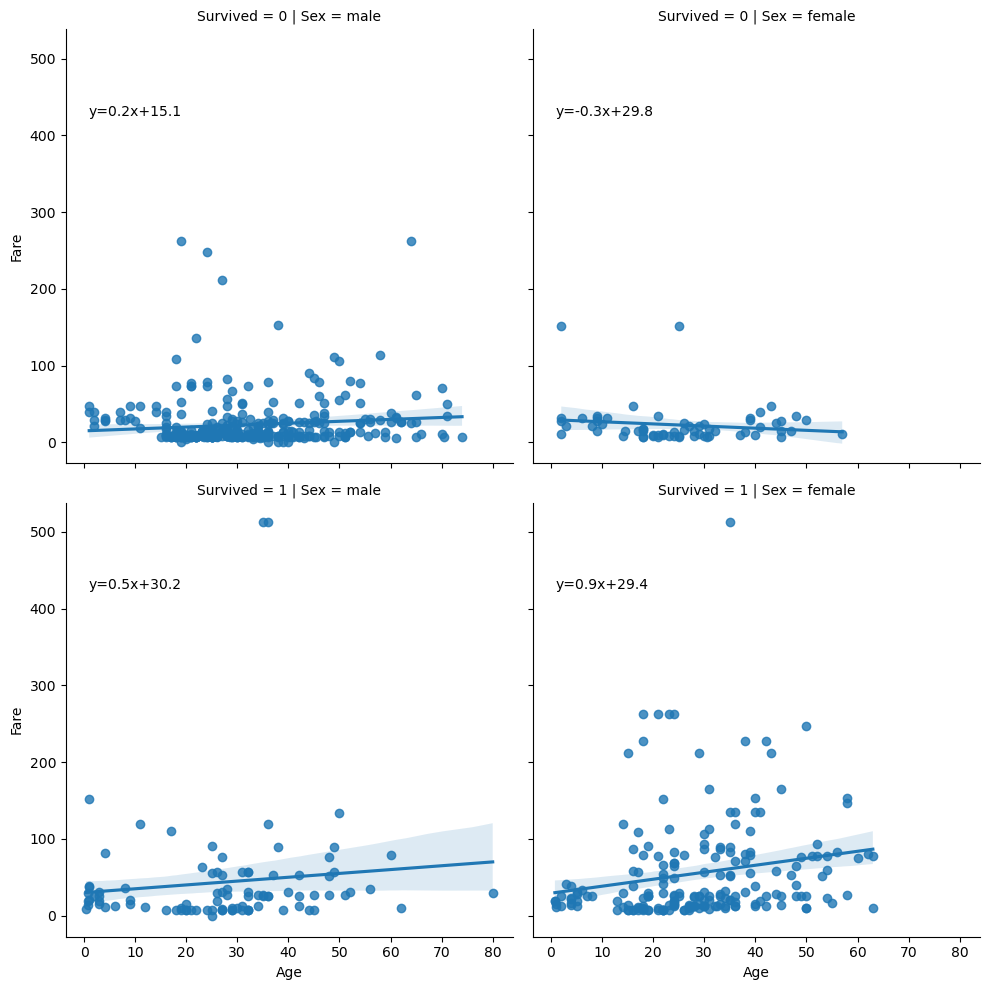

In [44]:
# adapted from https://stackoverflow.com/questions/25579227/seaborn-lmplot-with-equation-and-r2-text

from scipy import stats

g = sns.lmplot(x='Age', y='Fare', data=titanic_nona, row='Survived', col='Sex')

def annotate(data, **kws):
    slope, intercept, r_value, p_value, std_err = stats.linregress(data['Age'], data['Fare'])
    ax = plt.gca() #get current axis
    ax.text(.05, .8, f'y={slope:.1f}x+{intercept:.1f}', transform=ax.transAxes)

g.map_dataframe(annotate)
plt.show()

## 5. Let us save our plot in our local folder

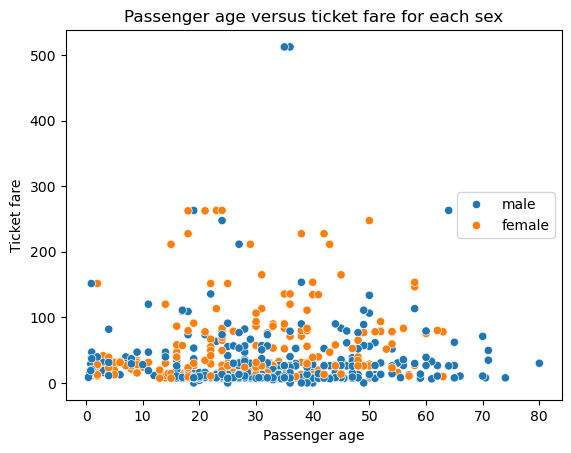

In [45]:
sns.scatterplot(data=titanic, x="Age", y="Fare", hue = "Sex")
plt.title('Passenger age versus ticket fare for each sex')
plt.xlabel('Passenger age')
plt.ylabel('Ticket fare')
plt.legend(loc='right')
plt.savefig('text_plot.png')

## Hooray! You have done a lot of job today!!

But this is not yet done, because we have entertaining exercise problems to challenge yourself with.

### Storm data set (a built-in data set in R)

- Description: This dataset is the NOAA Atlantic hurricane database best track data, https://www.nhc.noaa.gov/data/#hurdat. The data includes the positions and attributes of storms from 1975-2021. Storms from 1979 onward are measured every six hours during the lifetime of the storm. Storms in earlier years have some missing data.

- Format: A tibble with 19,066 observations and 13 variables:

- Variables:

    -name: Storm Name
    
    -year,month,day: Date of report
    
    -hour: Hour of report (in UTC)
    
    -lat,long: Location of storm center
    
    -status: Storm classification (Tropical Depression, Tropical Storm, or Hurricane)
    
    -category: Saffir-Simpson hurricane category calculated from wind speed.

        -NA: Not a hurricane
        -1: 64+ knots
        -2: 83+ knots
        -3: 96+ knots
        -4: 113+ knots
        -5: 137+ knots

    -wind: storm's maximum sustained wind speed (in knots)
    
    -pressure: Air pressure at the storm's center (in millibars)
    
    -tropicalstorm_force_diameter: Diameter (in nautical miles) of the area experiencing tropical storm strength winds (34 knots or above). Only available starting in 2004.
    
    -hurricane_force_diameter: Diameter (in nautical miles) of the area experiencing hurricane strength winds (64 knots or above). Only available starting in 2004.

As there are too many storms stored in the data set, let me read the data set and filter it for you:

In [61]:
storms = pd.read_csv('storm.csv')
storms_cut = storms.iloc[0:159, :] # selecting only the first 159 rows
storms_cut['time'] = pd.to_datetime(storms_cut['time'])
storms_cut.head()

C:\Users\Kiwon\AppData\Local\Temp\ipykernel_11088\3818456829.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  storms_cut['time'] = pd.to_datetime(storms_cut['time'])


,name,time,lat,long,status,wind,pressure
0,Amy,1975-06-27 00:00:00+00:00,27.5,-79.0,tropical depression,25,1013
1,Amy,1975-06-27 06:00:00+00:00,28.5,-79.0,tropical depression,25,1013
2,Amy,1975-06-27 12:00:00+00:00,29.5,-79.0,tropical depression,25,1013
3,Amy,1975-06-27 18:00:00+00:00,30.5,-79.0,tropical depression,25,1013
4,Amy,1975-06-28 00:00:00+00:00,31.5,-78.8,tropical depression,25,1012


In [62]:
storms_cut.dtypes

name                     object
time        datetime64[ns, UTC]
lat                     float64
long                    float64
status                   object
wind                      int64
pressure                  int64
dtype: object

### What kind of questions do we want to answer?

- Generate a histogram of `pressure`; how about different histograms of `pressure` based on each `status`?  
- Generate a boxplot of pressures for each storm (whose names are stored in the `name` column).
- Generate a countplot for each storm.
- Generate a scatter plot between `wind` and `pressure` depicting at the same time a linear line that fits the observations the best.
- Generate a scatter plot depicting the trajectories of each storm using `lat` and `long` column; which means the x-axis describes longitute whereas the y-axis describes latitude information of the center of the storms. Add grid lines as well.
- Generate a scatter plot depicting the `pressure` of each storm with respect to the time line. So the `time` column should be on the x-axis.
- (Challenge yourself) Generate a heat map depicting the average pressure for each combination of storm name and status. 

## References

- https://www.kaggle.com/competitions/titanic/data
- https://seaborn.pydata.org/api.html
- https://matplotlib.org/stable/gallery/showcase/anatomy.html
- https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html